In [261]:
import numpy as np
import random as rd
from operator import itemgetter

# Create costs
C = np.array([
    [3, 8, 9],
    [3, 3, 9],
    [7, 6, 8],
    [9, 7, 3],
    [9, 6, 4]
])

# Create inital parents with random values
init_parent1 = [rd.randint(0,2), rd.randint(0,2), rd.randint(0,2), rd.randint(0,2), rd.randint(0,2)]
init_parent2 = [rd.randint(0,2), rd.randint(0,2), rd.randint(0,2), rd.randint(0,2), rd.randint(0,2)]
parents = []

# Function takes 2 parents
def run_simulation(p1, p2):
    global parents
    
    # Iterate parents to convert strings to arrays
    child1 = [int(x) for x in p1]
    child2 = [int(x) for x in p2]

    # Crossover children, change values for steps 4 and 5
    temp_child1 = child1.copy()
    child1[3] = child2[3]
    child1[4] = child2[4]
    child2[3] = temp_child1[3]
    child2[4] = temp_child1[4]
    
    order = child1.copy()
    order2 = child2.copy()

    # Loop to get 20 solutions for each child
    for i in range(20):
        costs = []
        costs2 = []
        
        # Mutate children with 2% chance andcChange value for a random customer to a random supplier
        if rd.random() < 0.02:
            order[rd.randint(0, 4)] = rd.randint(0,2)
        if rd.random() < 0.02:
            order2[rd.randint(0, 4)] = rd.randint(0,2)

        # Add the total cost of the steps to a list
        for j, a in enumerate(C):
            costs.append(a[order[j]])
            costs2.append(a[order2[j]])

        # Add extra cost for centers opened
        if 0 in order:
            costs.append(7)
        if 1 in order:
            costs.append(5)
        if 2 in order:
            costs.append(7)
        if 0 in order2:
            costs2.append(7)
        if 1 in order2:
            costs2.append(5)
        if 2 in order2:
            costs2.append(7)

        # Convert order into a string for easier readability, add order and total cost to parents-list
        order_string = str(order)
        order_string = order_string.replace(', ', '').strip('[]')
        parents.append([order_string, sum(costs)])
        order_string2 = str(order2)
        order_string2 = order_string2.replace(', ', '').strip('[]')
        parents.append([order_string2, sum(costs2)])
        
    weight_sum = 0
    parent_weight = []
    
    # Sort potential parents by cost
    parents = sorted(parents, key=itemgetter(1))
    
    # Remove worst parents and reduce list size to 20
    while len(parents) > 20:
        del parents[-1]

    # Give weight value to potential parents - best parent has the highest chance of getting picked
    for i, (k, v) in enumerate(parents):
        weight = 1/(2+i) 
        weight_sum += weight
        parent_weight.append([k, weight])
        
    # Get random values between 0 and sum of all weights
    min_weight = 0
    r = rd.uniform(0, weight_sum)
    r1 = rd.uniform(0, weight_sum)
    new_parent1 = ''
    new_parent2 = ''
    
    # Loop through potential parents to see what gets picked
    for v in parent_weight:
        # Add weight and min_weight to weight_range
        weight_range = v[1] + min_weight

        # Check if random value is between min weight and parents weight
        if r > min_weight and r < weight_range:
            new_parent1 = v[0]

        if r1 > min_weight and r1 < weight_range:
            new_parent2 = v[0]

        # Add weight to min_weight to calculate next range(0 + 0.5 = 0.5 + 0.333 = 0.833 + 0.25....)
        min_weight += v[1]
    return [new_parent1, new_parent2, costs, costs2]

# inital run with inital parents
new_parents = run_simulation(init_parent1, init_parent2)

cost_progress = []
# Run the simulation n times
for i in range(100000):
    # Function returns the new parents -> New parents when we run again
    new_parents = run_simulation(new_parents[0], new_parents[1])
    if i % 1000 == 0:
        cost_progress.append(sum(new_parents[2] + new_parents[3]) / 2)
        print('Average of parents: ', (sum(new_parents[2]) + sum(new_parents[3])) / 2)
    


Average of parents:  42.5
Average of parents:  36.0
Average of parents:  36.5
Average of parents:  36.5
Average of parents:  39.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  37.0
Average of parents:  36.0
Average of parents:  34.0
Average of parents:  34.5
Average of parents:  39.5
Average of parents:  34.0
Average of parents:  36.5
Average of parents:  36.5
Average of parents:  36.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  36.5
Average of parents:  39.5
Average of parents:  37.0
Average of parents:  34.0
Average of parents:  34.0
Average of parents:  37.0
Average of parents:  34.0
Average of parents:  38.5
Average of parents:  36.5
Average of parents:  34.0
Average of parents:  37.5
Average of parents:  34.0
Average of p

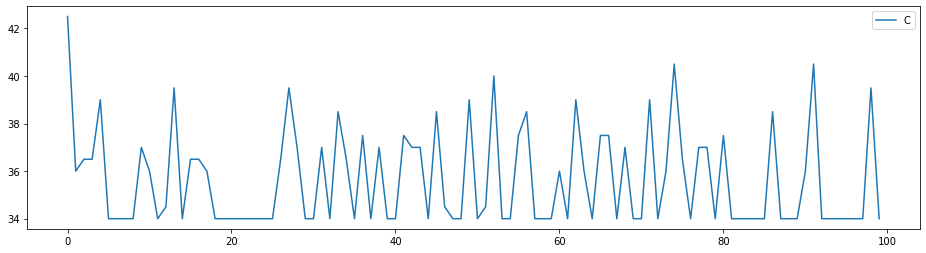

In [262]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 9))
plt.subplot(211)
plt.plot(cost_progress)
plt.legend('Cost progress')
plt.show()

In [3]:
# PMX Crossover

# Create parents
p1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
p2 = [9, 3, 7, 8, 2, 6, 5, 1, 4]

child = [0, 0, 0, 0, 0, 0, 0, 0, 0]
not_used = []

for i in range(3, 7):
    child[i] = p1[i]
    not_used.append(p2[i])
for i in range(9):
    if p2.index(p1[i]) == p1.index(p2[i]):
        print("Match")
    else:
        print(p2.index(p1[i]))
        child[i] = p1[p2.index(p1[i])]
    
    
print(child)
print(not_used)

7
4
1
8
6
Match
2
3
0
[8, 5, 2, 9, 7, 6, 3, 4, 1]
[8, 2, 6, 5]
